# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
url  = "https://raw.githubusercontent.com/gshinde05/gauri_shinde/main/csv_result-Rice_Cammeo_Osmancik.csv"
col_names = ['Area', 
             'Perimeter', 
             'Major_Axis_Length', 
             'Minor_Axis_Length'
             'Eccentricity',
             'Convex_Area',
             'Extent',
             'Class']
dataset = pd.read_csv(url, names=col_names)

## Data Analysis EDA

In [3]:
dataset.shape

(200, 7)

In [4]:
dataset.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_LengthEccentricity,Convex_Area,Extent,Class
14887,493.045013,199.164917,96.693703,0.874239,15347,0.617129,Cammeo
14493,506.841003,219.003082,84.919296,0.921763,14804,0.541107,Cammeo
14897,491.184998,205.719849,92.875694,0.892288,15137,0.594453,Cammeo
14690,506.855011,214.159485,88.876007,0.909822,15064,0.584397,Cammeo
13950,476.337006,193.635239,92.944168,0.877271,14280,0.715641,Cammeo


In [5]:
dataset.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_LengthEccentricity,Convex_Area,Extent,Class
11226,413.549988,168.533478,85.627701,0.861313,11424,0.772396,Osmancik
12478,439.221985,176.343948,91.289749,0.855574,12754,0.635822,Osmancik
12756,442.975006,177.986343,92.229248,0.855271,13028,0.703740,Osmancik
11769,426.309998,176.114594,85.902138,0.872976,11928,0.791193,Osmancik
11962,440.545013,181.723404,85.197182,0.883289,12283,0.622859,Osmancik


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 14887 to 11962
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           200 non-null    float64
 1   Perimeter                      200 non-null    float64
 2   Major_Axis_Length              200 non-null    float64
 3   Minor_Axis_LengthEccentricity  200 non-null    float64
 4   Convex_Area                    200 non-null    int64  
 5   Extent                         200 non-null    float64
 6   Class                          200 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 12.5+ KB


In [7]:
dataset.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_LengthEccentricity,Convex_Area,Extent
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,483.447810,202.974675,89.333908,0.896627,14408.040000,0.669336
std,28.736656,13.870434,5.309219,0.015375,1537.345169,0.082091
min,398.920013,164.094070,74.657585,0.845340,9760.000000,0.534566
25%,469.143250,196.421425,85.557289,0.888044,13446.000000,0.597382
50%,487.518509,205.082954,88.945335,0.898831,14574.000000,0.663011
75%,503.420753,213.383568,92.820189,0.908707,15465.250000,0.735914
max,537.447022,232.036820,106.337822,0.934006,18062.000000,0.830688


In [8]:
dataset.groupby('Class').size()

Class
Cammeo      177
Osmancik     23
dtype: int64

## Data Preprocessing

In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 0)

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train)

[[ 4.70341625e-01  5.74273884e-01  2.20741021e-01  4.31972288e-01
   4.54310458e-01 -8.47522267e-01]
 [ 9.54720936e-01  5.57289096e-01  1.12855405e+00 -2.91253768e-01
   1.02330602e+00 -1.05437403e+00]
 [ 6.49247732e-01  7.61575399e-01  6.88744082e-01  2.40536107e-01
   8.71748076e-01  1.42199667e+00]
 [ 2.25628105e-01  4.98536857e-01 -1.03238750e+00  1.27975392e+00
  -1.74785671e-01  1.30307995e+00]
 [-5.38577948e-01 -3.95981960e-01 -1.09323285e+00  5.99361334e-01
  -7.92776261e-01 -1.34375569e+00]
 [-7.94845071e-01 -1.20030519e+00  6.03586062e-01 -1.82798862e+00
  -4.91620170e-01  1.03689431e-01]
 [ 2.21874557e-02 -1.41632062e-01  4.06248807e-03 -5.22467739e-02
  -6.89564156e-02 -1.29273540e-01]
 [-1.54660908e-02 -1.73407942e-01  2.09247336e-01 -2.55270308e-01
  -1.80015890e-02 -8.45375451e-01]
 [ 6.61706165e-01  6.35259070e-01  4.33744584e-01  3.23612419e-01
   6.62702634e-01 -4.77254820e-01]
 [ 1.30693105e+00  5.54346357e-01  3.19521961e+00 -2.08315715e+00
   2.14561874e+00  2.1502

In [13]:
print(X_test)

[[-5.19015077e-02 -3.27061096e-02 -6.32414789e-01  5.58587461e-01
  -3.61620035e-01 -1.34287443e+00]
 [ 4.39404228e-01  4.29251168e-01  3.76804255e-01  1.84658878e-01
   4.03355631e-01 -1.34397000e+00]
 [ 6.18414414e-01  1.34109713e+00 -1.92516644e+00  2.38384581e+00
  -2.74735523e-01  1.53129522e+00]
 [ 9.18077364e-01  1.00368879e+00  4.99121430e-01  5.85141673e-01
   8.95918955e-01  2.43086959e-01]
 [-1.35769838e+00 -1.60025458e+00 -3.95039232e-01 -1.33667296e+00
  -1.31081700e+00 -9.61790106e-01]
 [-6.65702599e-01 -8.58046090e-01 -2.97176522e-01 -5.36060038e-01
  -7.24836492e-01  8.37652386e-01]
 [ 3.93538167e-01  2.40291291e-01  7.27311009e-01 -2.74075606e-01
   5.03305484e-01 -1.01209236e+00]
 [ 1.02783498e+00  1.27813303e+00  4.05934901e-01  8.66526896e-01
   1.03767790e+00 -1.12316431e+00]
 [-1.77842021e-01 -4.10643305e-01 -1.35909010e-01 -2.02859766e-01
  -2.75388790e-01  3.01667705e-01]
 [-5.46825513e-01 -2.60449269e-01 -1.38258319e+00  9.40416726e-01
  -9.22776395e-01  3.5214

## Training the K-NN model on the Training set

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
classifier.fit(X_train,y_train)

KNeighborsClassifier()

## Getting nearest neighbours for each point in training data

In [15]:
classifier.kneighbors(X=X_train, n_neighbors=5, return_distance=False)

array([[  0, 107,   8, 157,  10],
       [  1,  16, 116, 127,  19],
       [  2,  87,  91,  58, 133],
       [  3, 122,  20,  81, 100],
       [  4,  56,  30,  42, 112],
       [  5,  49, 134, 121, 109],
       [  6, 110,  97, 129,  24],
       [  7, 151, 110,  96, 102],
       [  8,   0,  60, 107, 123],
       [  9,  66, 135,  39, 116],
       [ 10, 145,  73,  86, 157],
       [ 11,  82, 126,  53,  17],
       [ 12,  55, 156,  40,  22],
       [ 13,  32,  99, 131,  73],
       [ 14, 111, 137,  69,  57],
       [ 15, 103, 151,   7,  18],
       [ 16,   1, 116,  19, 108],
       [ 17, 126, 117,  18,  97],
       [ 18, 103,  97, 117, 148],
       [ 19,  93,  16, 108,   8],
       [ 20, 128, 122,   3,  53],
       [ 21,  73, 127, 145, 119],
       [ 22,  55, 144,  12,  52],
       [ 23, 115,  79,  83, 106],
       [ 24, 102, 110, 107, 108],
       [ 25,  48, 125,  75, 106],
       [ 26,  42, 112,  88,  95],
       [ 27, 140,  50, 129,  84],
       [ 28,  37, 111,  14,  71],
       [ 29,  

## Predicting the Test set results

In [16]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Osmancik']
 ['Cammeo' 'Osmancik']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Osmancik' 'Osmancik']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Osmancik' 'Osmancik']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Osmancik' 'Osmancik']
 ['Osmancik' 'Osmancik']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Osmancik' 'Osmancik']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']
 ['Cammeo' 'Cammeo']]


## Evaluating the Algorithm
## Making the Confusion Matrix & Predicting Accuracy Score

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

[[33  0]
 [ 2  5]]
Accuracy of our model is equal 95.0 %.


## Making Classification Report

In [18]:
from sklearn.metrics import classification_report
# here f1 score is goodness of fit .
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Cammeo       0.94      1.00      0.97        33
    Osmancik       1.00      0.71      0.83         7

    accuracy                           0.95        40
   macro avg       0.97      0.86      0.90        40
weighted avg       0.95      0.95      0.95        40



## Comparing Error Rate with the K Value
## Parameter Tuning Using 
##cross-validation for parameter tuning:

In [19]:
from sklearn.model_selection import cross_val_score

# creating list of K for KNN
k_list = list(range(1,50))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


## plot the error values against K values

<Figure size 640x480 with 0 Axes>

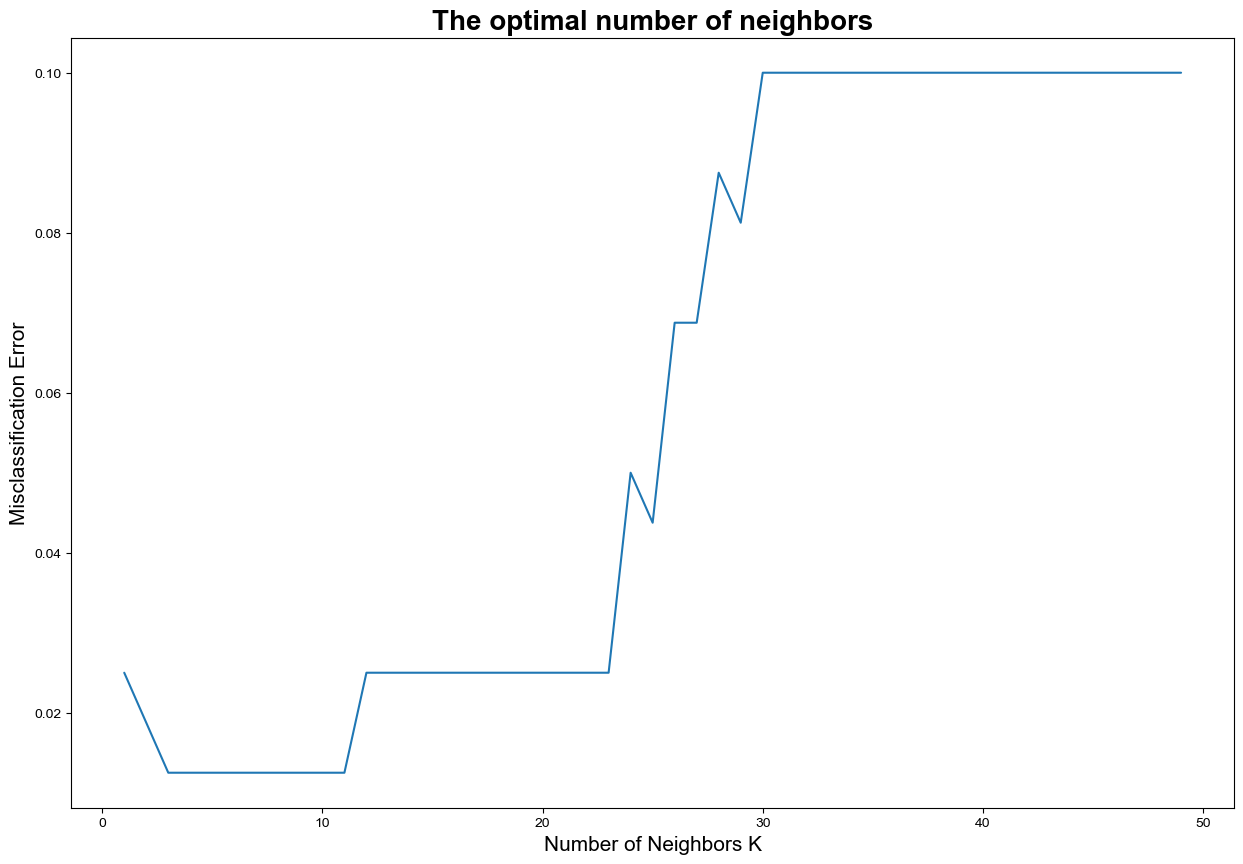

In [20]:
import seaborn as sns

# changing to misclassification error
MSE = [1-x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

## finding best k

In [21]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


## Task Your Knowledge
#### 1. For the model we created in lab sessions write the following results

Training accuracy=  95.0 %

Precision for (Cammeo)=0.94 (Osmancik)=0.83 

Class for Testing Example =Area=14887	Perimeter=493.045013 Major_Axis_Length=199.164917	Minor_Axis_LengthEccentricity=96.693703	 Convex_Area=0.874239	Extent=15347	79	t

In [22]:
test_example=[[493.045013,199.164917,96.693703,	0.874239,	15347,	0.617129]]
predict_class = classifier.predict(test_example)
print("class for testing Example: ", predict_class)

class for testing Example:  ['Cammeo']


F1 Score for (Cammeo)=0.93 (Osmancik)=0.83

### 2. What is the best K value for the model you created in during Lab Session?

### 3. Which Method we used to Find Best K?

Cross_validation

## 4. Crete the model with following settings
n_neighbors= Any random Number,
p=2,
 metric=use other than 'minkowski'
 write a code in your .ipynb file and find following result

In [23]:
knn = KNeighborsClassifier(n_neighbors=15, p=2, metric='manhattan') 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Cammeo       0.89      1.00      0.94        33
    Osmancik       1.00      0.43      0.60         7

    accuracy                           0.90        40
   macro avg       0.95      0.71      0.77        40
weighted avg       0.91      0.90      0.88        40



Training Accuracy:- 90.0 %
Precision for (Cammeo)=0.89 (Osmancik)=1.00


Class for Testing Example =Area=14887 Perimeter=440.545013 Major_Axis_Length=181.723404, Minor_Axis_LengthEccentricity=85.197182, Convex_Area=0.883289 Extent=12283 


In [24]:
test_example=[[413.549988,	168.533478,	85.627701,	0.861313,	11424,	0.77239]]
predict_class = classifier.predict(test_example)
print("class for testing Example: ", predict_class)

class for testing Example:  ['Cammeo']


## 5. What is the best K value for the above model


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Creating list of K for KNN
k_list = list(range(1, 80))

# Creating list of cv scores
cv_scores = []

# Perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Finding the best K value
best_k = k_list[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d." % best_k)


The optimal number of neighbors is 3.
